![](https://github.com/destination-earth/DestinE-DataLake-Lab/blob/main/img/DestinE-banner.jpg?raw=true)



# DEDL - EODAG - DestinE Data Lake Provider (DEDL) 

**Author**: EUMETSAT <br>
**Copyright**: 2024 EUMETSAT <br>
**Licence**: MIT <br>

<div class="alert alert-block alert-success">
<h3>How to use EODAG to search and access DEDL data</h3> 
EODAG is a command line tool and a Python package for searching and downloading earth observation data via a unified API regardless of the data provider. Detailed information about the usage of EODAG can be found on the <a href="https://eodag.readthedocs.io/en/stable/index.html">project documentation page</a>.
    
This notebook demonstrates how to use the DEDL provider in EODAG, using Python code.
</div>

1. [Setup](HDA-EODAG-full-version.ipynb#Setup): *EODAG* configuration to use the provider *DEDL* .
2. [Search](HDA-EODAG-full-version.ipynb#Search): search *DEDL* data, we search for Sentinel-3 data.
3. [Filter](HDA-EODAG-full-version.ipynb#Filter): filter *DEDL* data. 
4. [Download](HDA-EODAG-full-version.ipynb#Download): download *DEDL* data.

The complete guide on how to use EODAG Python API is available via https://eodag.readthedocs.io/en/stable/api_user_guide.html.

<div class="alert alert-block alert-warning">
<b> Prequisites: </b>
For search and download dedl products : <a href="https://platform.destine.eu/"> DestinE user account</a>
</div>

<div class="alert alert-block alert-warning">
<b> Note:</b>
    
Please note that the two factor authentication (2FA) is still not implemented in EODAG. The users who have enabled 2FA on DESP will not be able to run this notebook.
</div>

## Setup
In this section, we set:
- The output_dir, the directory where to store downloaded products.
- The DEDL credentials, you'll be asked to enter your DEDL credentials.
- The search timeout, it is of 60 seconds to avoid any unexpected errors because of long running search queries. 

In [2]:
import os
from getpass import getpass

workspace = 'eodag_workspace'
if not os.path.isdir(workspace):
    os.mkdir(workspace)
    
os.environ["EODAG__DEDL__DOWNLOAD__OUTPUT_DIR"] = os.path.abspath(workspace)
#os.environ["EODAG__DEDL__DOWNLOAD__OUTPUTS_PREFIX"] = os.path.abspath(workspace)

os.environ["EODAG__DEDL__PRIORITY"]="10"
os.environ["EODAG__DEDL__SEARCH__TIMEOUT"]="60"


DESP_USERNAME = input("Please input your DESP username or email: ")
DESP_PASSWORD = getpass("Please input your DESP password: ")

os.environ["EODAG__DEDL__AUTH__CREDENTIALS__USERNAME"]=DESP_USERNAME
os.environ["EODAG__DEDL__AUTH__CREDENTIALS__PASSWORD"]=DESP_PASSWORD


Please input your DESP username or email:  eum-dedl-user
Please input your DESP password:  ········


### Import EODAG and list available products on DEDL

We now need to import the EODataAccessGateway class. The class is going to take care of  all the following operations.

We can start listing the products available using dedl as provider.

In [ ]:

from eodag import EODataAccessGateway
dag = EODataAccessGateway()

In [7]:
[product_type["ID"] + ", " + product_type["title"] for product_type in dag.list_product_types("dedl")]

['AERIS_IAGOS, In-service Aircraft for a Global Observing System',
 'CAMS_EAC4, CAMS global reanalysis (EAC4)',
 'CAMS_EAC4_MONTHLY, CAMS global reanalysis (EAC4) monthly averaged fields',
 'CAMS_EU_AIR_QUALITY_FORECAST, CAMS European air quality forecasts',
 'CAMS_EU_AIR_QUALITY_RE, CAMS European air quality reanalyses',
 'CAMS_GAC_FORECAST, CAMS global atmospheric composition forecasts',
 'CAMS_GFE_GFAS, CAMS global biomass burning emissions based on fire radiative power (GFAS)',
 'CAMS_GLOBAL_EMISSIONS, CAMS global emission inventories',
 'CAMS_GREENHOUSE_EGG4, CAMS global greenhouse gas reanalysis (EGG4)',
 'CAMS_GREENHOUSE_EGG4_MONTHLY, CAMS global greenhouse gas reanalysis (EGG4) monthly averaged fields',
 'CAMS_GREENHOUSE_INVERSION, CAMS global inversion-optimised greenhouse gas fluxes and concentrations',
 'CAMS_GRF, CAMS global radiative forcings',
 'CAMS_GRF_AUX, CAMS global radiative forcing - auxilliary variables',
 'CAMS_SOLAR_RADIATION, CAMS solar radiation time-series',


## Search

To search we use the *search* method passing the ID of our dataset of interest and a geo-time filter. 

The *search* method returns a *SearchResult* object that stores the products obtained from a given page (default: page=1) and a given maximum number of items per page (default: items_per_page=20). The search_all() method can be used instead.

In the following cell, we change the default value of *items_per_page* and define the search criteria to retrieve Sentinel-2 MSI Level-2 images over Sicily, first days of July 2024. Our goal is to check whether any effects of Mount Etna’s eruptions during that period are visible in the Sentinel-2 imagery.

In [8]:
search_criteria = {
    "provider":"dedl",
    "productType": "EO.ESA.DAT.SENTINEL-2.MSI.L2A",
    "start": "2024-07-04T07:00:00.00Z",
    "end": "2024-07-08T07:00:00.00Z",
    "geom": {"lonmin": 12, "latmin": 37, "lonmax": 16, "latmax": 39},
    "count": True,
    "items_per_page": 50
}

In [9]:
products_first_page = dag.search(**search_criteria)

Results are stored in a 'SearchResult' object that contains the details on the single search result.

In [10]:
products_first_page

SearchResult([EOProduct(id=S2B_MSIL2A_20240705T094549_N0510_R079_T32SQF_20240705T122657, provider=dedl),
              EOProduct(id=S2B_MSIL2A_20240705T094549_N0510_R079_T33STB_20240705T122657, provider=dedl),
              EOProduct(id=S2B_MSIL2A_20240705T094549_N0510_R079_T33SVC_20240705T122657, provider=dedl),
              EOProduct(id=S2B_MSIL2A_20240705T094549_N0510_R079_T33SWC_20240705T122657, provider=dedl),
              EOProduct(id=S2B_MSIL2A_20240705T094549_N0510_R079_T33STC_20240705T122657, provider=dedl),
              EOProduct(id=S2B_MSIL2A_20240705T094549_N0510_R079_T33SUD_20240705T122657, provider=dedl),
              EOProduct(id=S2B_MSIL2A_20240705T094549_N0510_R079_T33SUA_20240705T122657, provider=dedl),
              EOProduct(id=S2B_MSIL2A_20240705T094549_N0510_R079_T33STA_20240705T122657, provider=dedl),
              EOProduct(id=S2B_MSIL2A_20240705T094549_N0510_R079_T33SWB_20240705T122657, provider=dedl),
              EOProduct(id=S2B_MSIL2A_20240705T094549_N0510_R079_T33SUB_20240705T122657, provider=dedl),
              EOProduct(id=S2B_MSIL2A_20240705T094549_N0510_R079_T33SWA_20240705T122657, provider=dedl),
              EOProduct(id=S2B_MSIL2A_20240705T094549_N0510_R079_T32SQG_20240705T122657, provider=dedl),
              EOProduct(id=S2B_MSIL2A_20240705T094549_N0510_R079_T33SWD_20240705T122657, provider=dedl),
              EOProduct(id=S2B_MSIL2A_20240705T094549_N0510_R079_T33SVD_20240705T122657, provider=dedl),
              EOProduct(id=S2B_MSIL2A_20240705T094549_N0510_R079_T33SUC_20240705T122657, provider=dedl),
              EOProduct(id=S2B_MSIL2A_20240705T094549_N0510_R079_T33SVB_20240705T122657, provider=dedl),
              EOProduct(id=S2B_MSIL2A_20240705T094549_N0510_R079_T33SVA_20240705T122657, provider=dedl),
              EOProduct(id=S2A_MSIL2A_20240707T094041_N0510_R036_T33SWC_20240707T131659, provider=dedl),
              EOProduct(id=S2A_MSIL2A_20240707T094041_N0510_R036_T33SWB_20240707T131659, provider=dedl),
              EOProduct(id=S2A_MSIL2A_20240707T094041_N0510_R036_T33SVA_20240707T131659, provider=dedl),
              EOProduct(id=S2A_MSIL2A_20240707T094041_N0510_R036_T33SWD_20240707T131659, provider=dedl),
              EOProduct(id=S2A_MSIL2A_20240707T094041_N0510_R036_T33SWA_20240707T131659, provider=dedl),
              EOProduct(id=S2A_MSIL2A_20240707T094041_N0510_R036_T33SVC_20240707T131659, provider=dedl),
              EOProduct(id=S2A_MSIL2A_20240707T094041_N0510_R036_T33SVB_20240707T131659, provider=dedl)])

It is possible to list the metadata associated with a certain product, we choose the first one returned [0], and look into it.

In [11]:
one_product = products_first_page[0]
one_product.properties.keys()

dict_keys(['abstract', 'instrument', 'platform', 'platformSerialIdentifier', 'processingLevel', 'keywords', 'sensorType', 'license', 'title', 'missionStartDate', 'productType', 'publicationDate', 'orbitNumber', 'cloudCover', 'modificationDate', 'sensorMode', 'startTimeFromAscendingNode', 'completionTimeFromAscendingNode', 'id', 'downloadLink', 'thumbnail', 'storageStatus', 'defaultGeometry', 'quicklook', 'providers', 'start_datetime', 'sat:absolute_orbit', 'sar:product_type', 'dedl:processorVersion', 'dedl:granuleIdentifier', 'dedl:tileIdentifier', 'dedl:sourceProduct', 'dedl:productGroupId', 'dedl:uid', 'dedl:origin', 'dedl:sourceProductOriginDate', 'dedl:endingDateTime', 'dedl:beginningDateTime', 'dedl:datastripId', 'dedl:scope'])

In [12]:
one_product.properties['cloudCover']

0.000265

## Filter

EODAG can filter the search result. We can then refine our initial search without asking the provider again.
Products can be filtered according to their properties or also with finer geometry filters.


The following example shows how to filter products to keep only those whose cloud coverage is less than 20%. And then restrict the results to products containing a smaller area over the mount Etna.

Let's define now a smaller area around the mount Etna and a function to see the area on a map together with the results

In [13]:
from eodag.crunch import FilterProperty
from eodag.crunch import FilterOverlap
import shapely
import folium
from shapely.geometry import Polygon

small_geom = Polygon([[15.1, 37.7], [15.5, 37.7], [15.1, 37.75], [15.1, 37.75], [15.1, 37.7]])

smaller_area = {"lonmin": 15.1, "latmin": 37.7, "lonmax": 15.5, "latmax": 37.75}

search_geometry = shapely.geometry.box(
    smaller_area["lonmin"],
    smaller_area["latmin"],
    smaller_area["lonmax"],
    smaller_area["latmax"],
)

In [14]:

def create_search_result_map(search_results, extent):
    """Small utility to create an interactive map with folium
    that displays an extent in red and EO Producs in blue"""
    fmap = folium.Map([38, 14], zoom_start=7)
    folium.GeoJson(
        extent,
        style_function=lambda x: dict(color="red")
    ).add_to(fmap)
    folium.GeoJson(
        search_results
    ).add_to(fmap)
    return fmap

In [15]:
# Crunch the results
filtered_results = products_first_page.crunch(FilterProperty({"cloudCover": 20, "operator" : "lt"}))

print(f"Got now {len(filtered_results)} products after filtering by cloudCover.")

Got now 22 products after filtering by cloudCover.


In [16]:
filtered_products = filtered_results.crunch(
    FilterOverlap(dict(contains=True)),
    geometry=small_geom
)
print(f"Got now {len(filtered_products)} products after filtering by geometry.")

Got now 1 products after filtering by geometry.


Let's use the function defined to see the area defined on a map (red) together with the initial results (blue) filtered by cloud coverage and geometry (green).

In [17]:
fmap = create_search_result_map(products_first_page, search_geometry)
# Create a layer that represents the filtered products in green
folium.GeoJson(
    filtered_products,
    style_function=lambda x: dict(color="green")
).add_to(fmap)
fmap


## Download

Before downloading any product, it can be useful to have a quick look at them.

In [18]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

quicklooks_dir = os.path.join(workspace, "quicklooks")
if not os.path.isdir(quicklooks_dir):
    os.mkdir(quicklooks_dir)



0.00B [00:00, ?B/s]

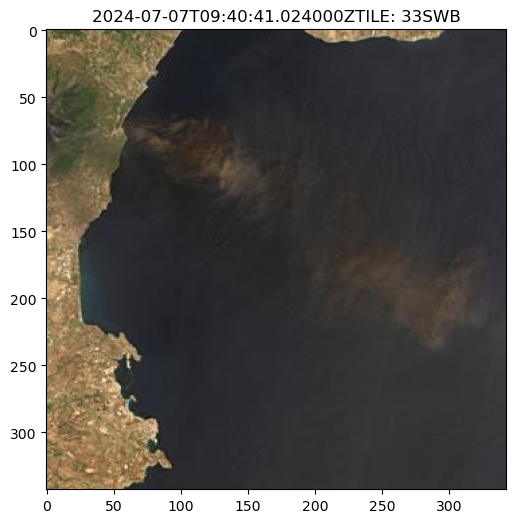

In [19]:
fig = plt.figure(figsize=(20, 40))
for i, product in enumerate(filtered_products, start=1):

    # This line takes care of downloading the quicklook
    quicklook_path = product.get_quicklook()
    
    img = mpimg.imread(quicklook_path)
    ax = fig.add_subplot(8, 2, i)
    ax.set_title(product.properties['dedl:beginningDateTime'] + "TILE: " +product.properties['dedl:tileIdentifier'])
    plt.imshow(img)
plt.tight_layout()

The quicklook shows effectively the ash plume caused by the eruptions.

EOProducts can be downloaded individually. The last image is going to be downloaded.

In [20]:
product_to_download = filtered_products[-1]
product_path = dag.download(product_to_download)
product_path

0.00B [00:00, ?B/s]

'/home/jovyan/dev-branch/DestinE-DataLake-Lab/HDA/EODAG/eodag_workspace/S2A_MSIL2A_20240707T094041_N0510_R036_T33SWB_20240707T131659'

The location property of this product now points to a local path.

In [21]:
product_to_download.location

'file:///home/jovyan/dev-branch/DestinE-DataLake-Lab/HDA/EODAG/eodag_workspace/S2A_MSIL2A_20240707T094041_N0510_R036_T33SWB_20240707T131659'